In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
period= str(1)
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5", 0, -1)
dfdata= qr_data.getDF()
print "query done. data ", dfdata.index.size," mc: ", qr_mc1.df.index.size

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
query done. data  2000000  mc:  2000000


In [5]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_"+period) 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_"+period) 
dfmcEB= qr_mc1.getDF() 
dfmcEE= qr_mc2.getDF() 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

Corrected variables file (e.g.  correctedTargetsweights_Period_1_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_1/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Loading mc weights for  S4  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  S4
    ./weights/weights_Period_1/data_weights_EB
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4
Loading mc weights for  SigmaIeIe  : 
    ./weights/weights_Period_1/mc_weights_EB
Loading data weights for  SigmaIeIe
    ./weights/weights_Period_1/data_weights_EB
Loading mc weights for  EtaWidth  : 
    ./weights/weights_Peri

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


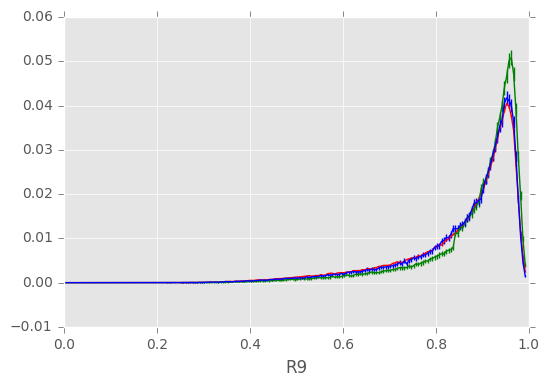

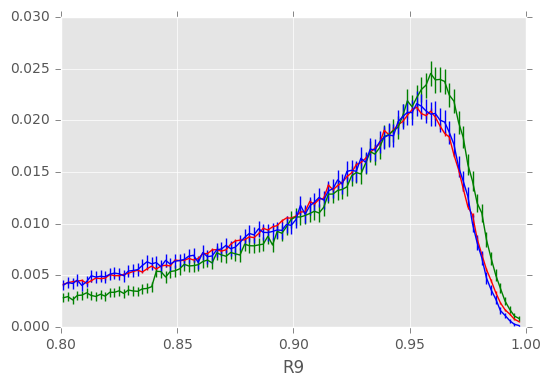

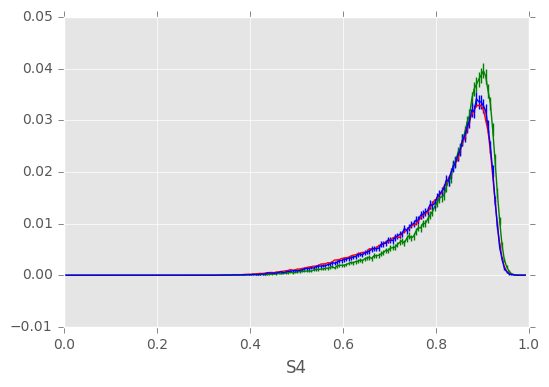

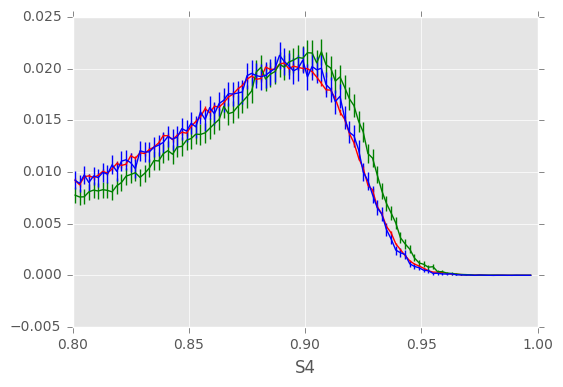

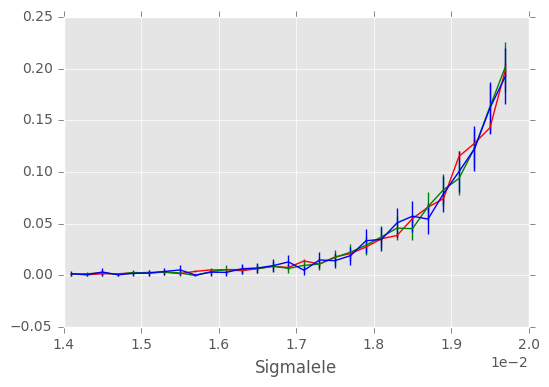

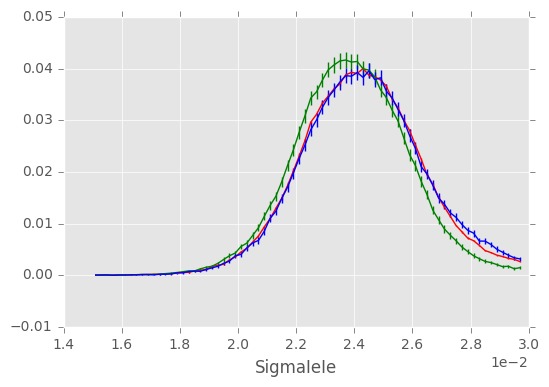

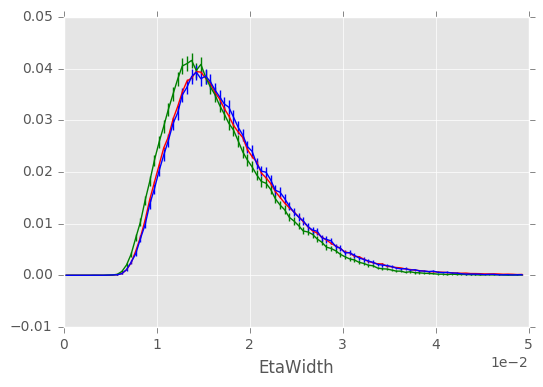

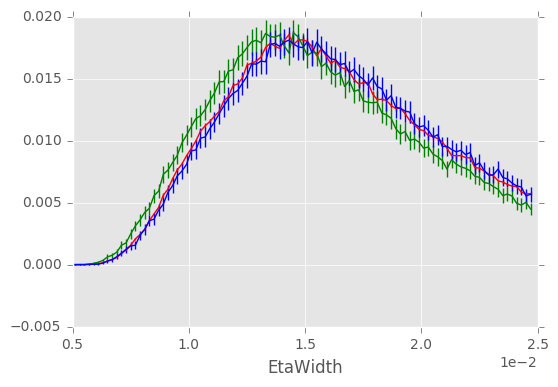

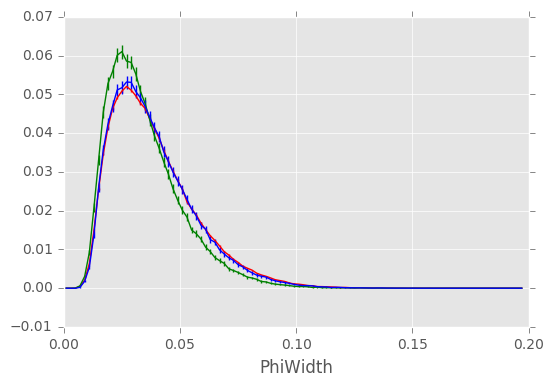

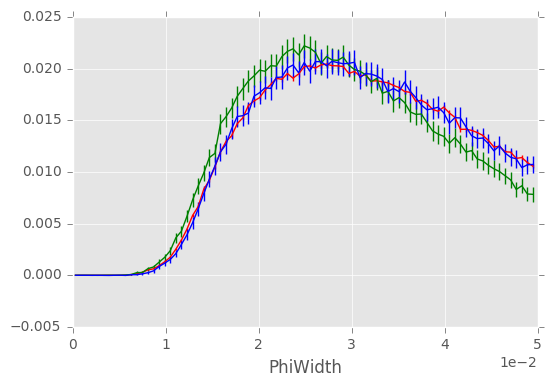

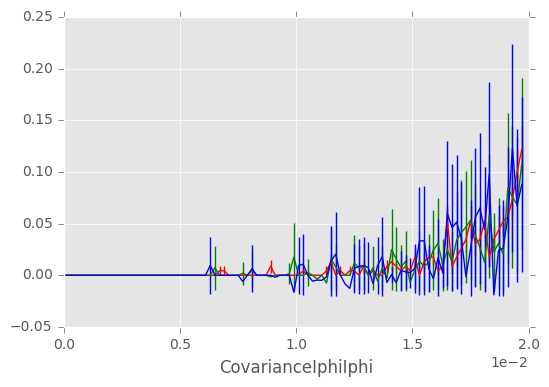

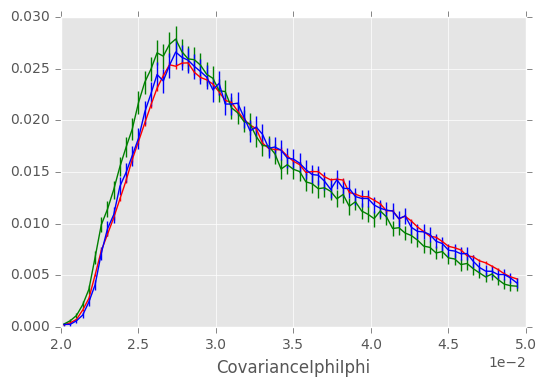

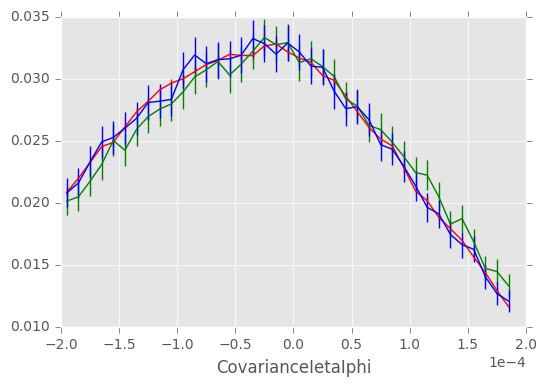

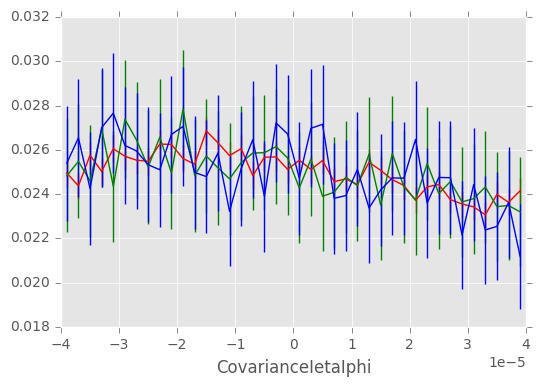

In [6]:
# All periods + integrated + EB
dfm=dfmc
dfd=dfdata
sec= "EE"
name0="Period_"+period+"_Integrated_"+sec
section= "section22"
#f = open('Plots/'+section+'.tex', "w")
#f.write("\part{Period "+period+" Integrated "+sec+"}")
#f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.005)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.004)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.005)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.012,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    #plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    #plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


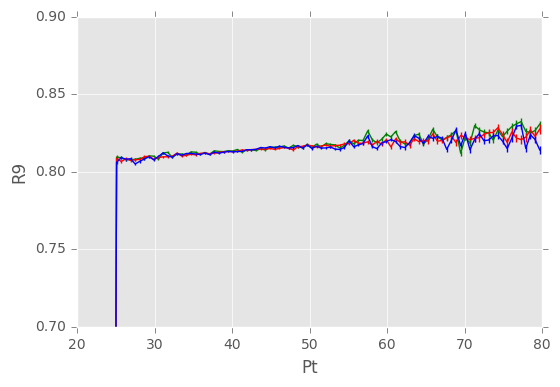

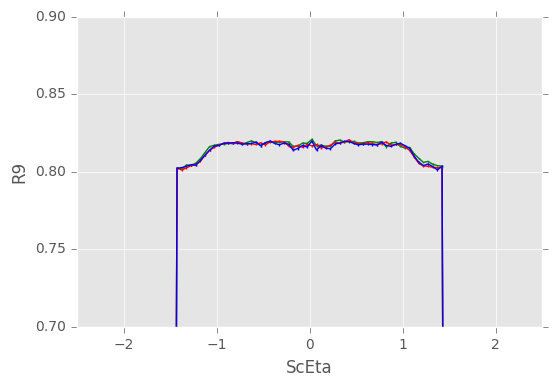

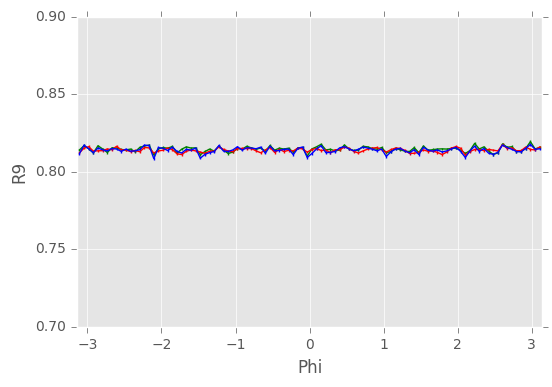

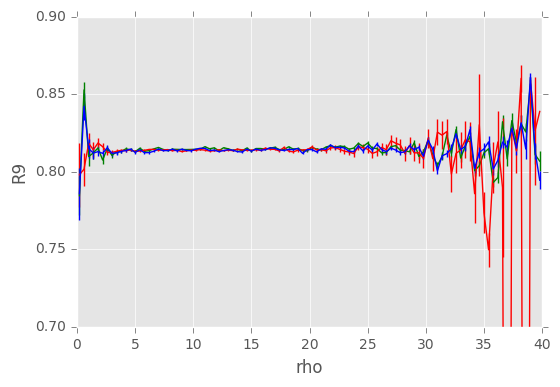

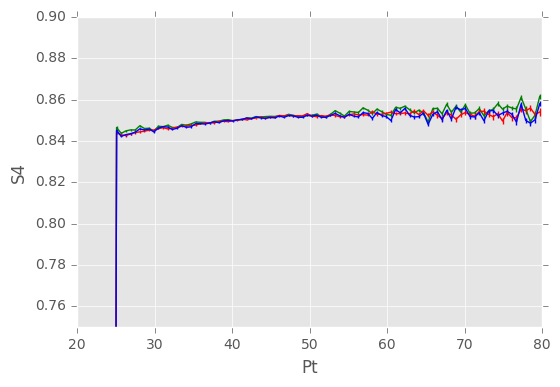

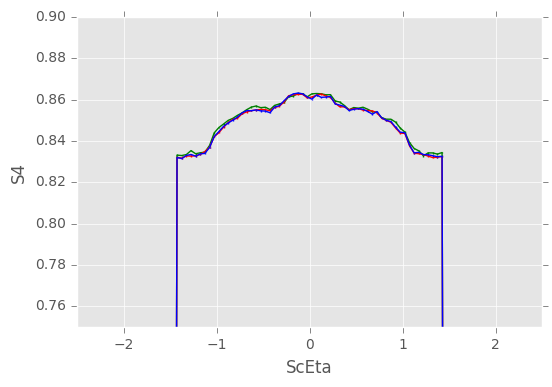

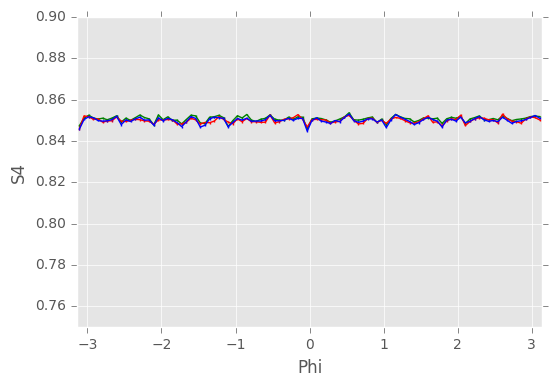

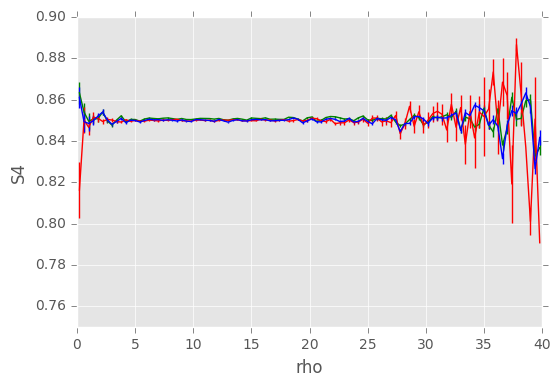

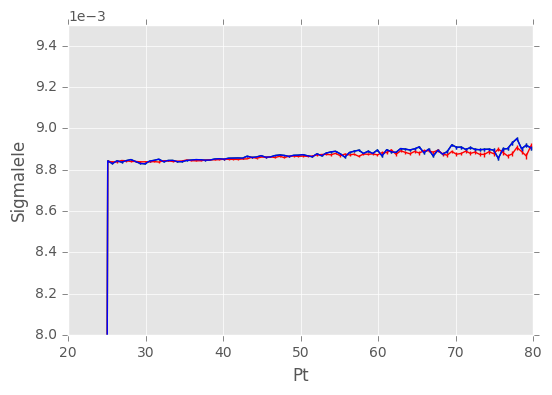

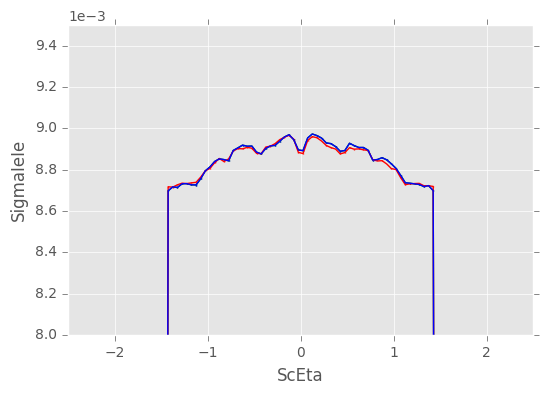

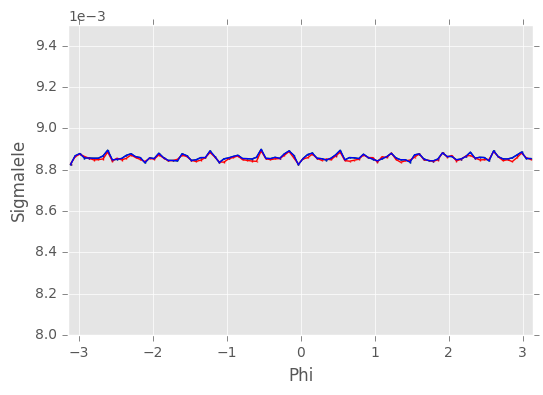

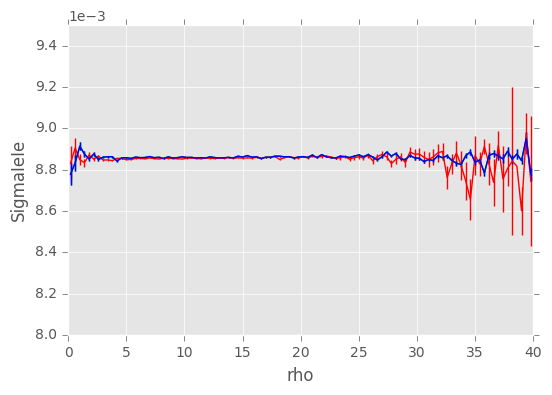

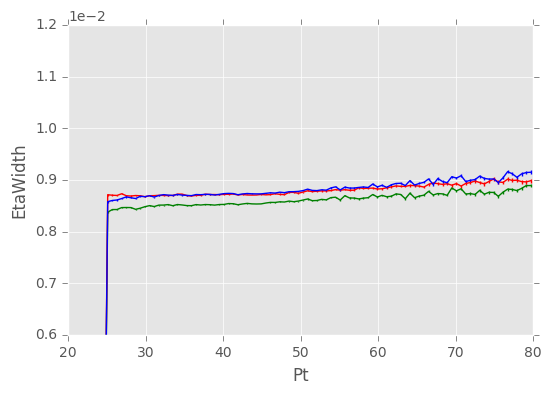

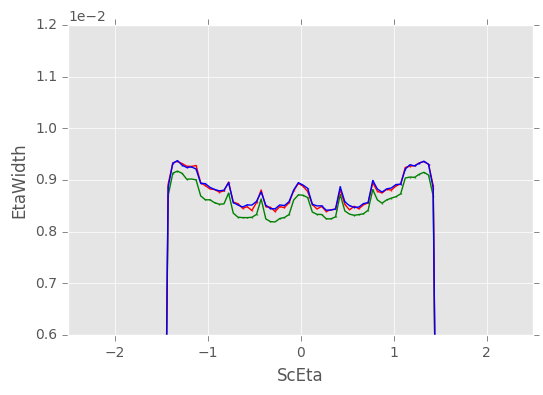

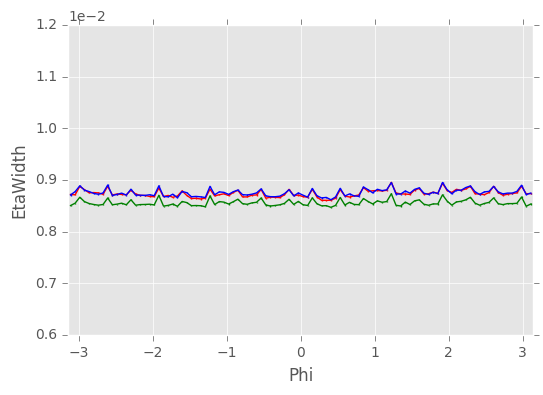

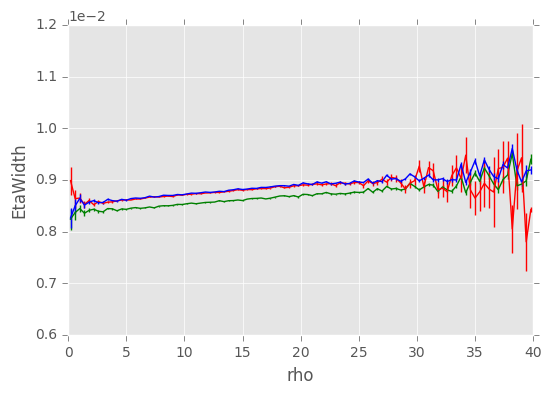

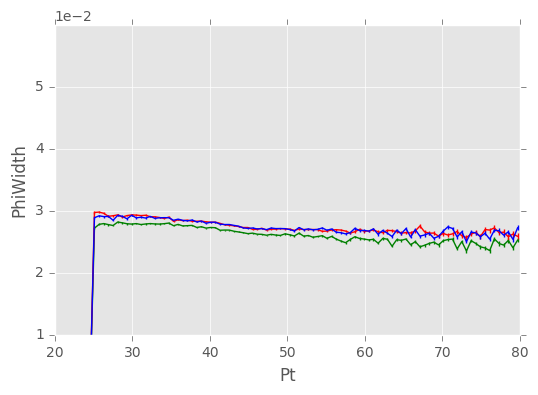

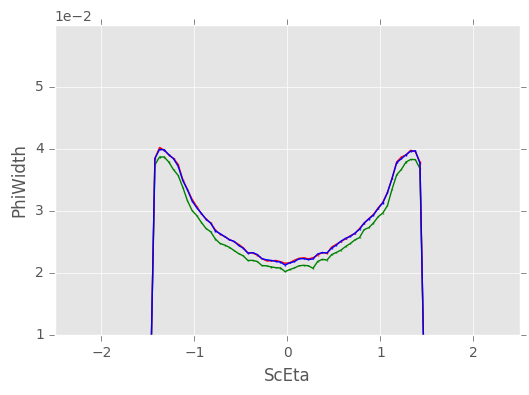

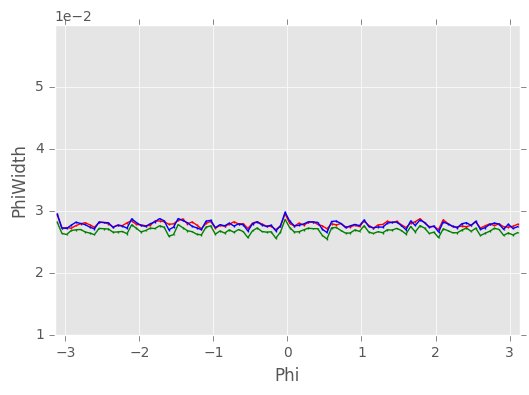

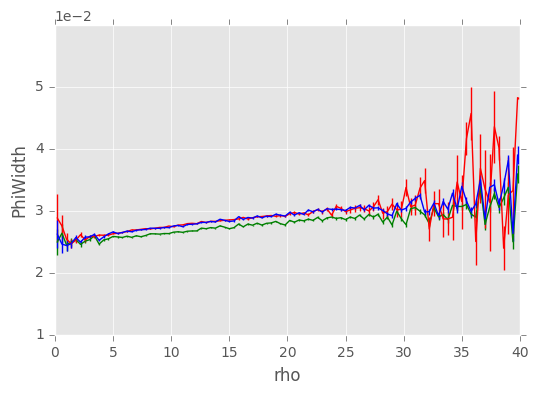

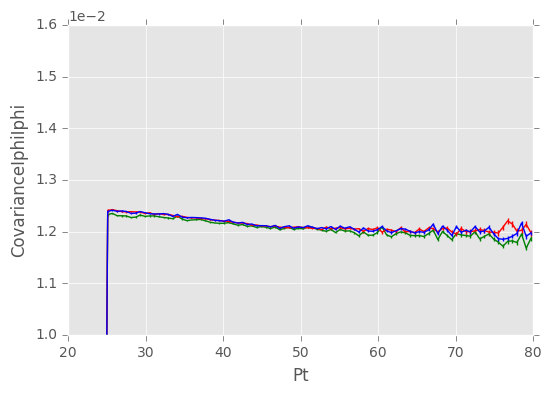

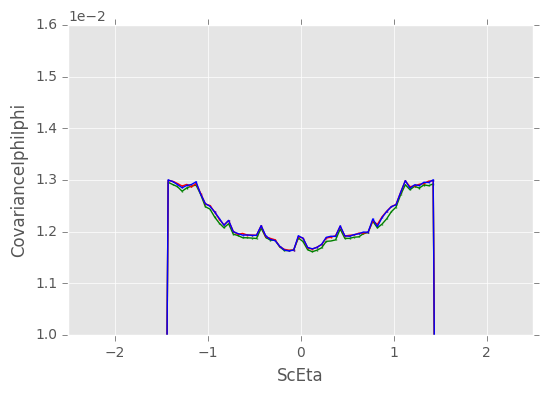

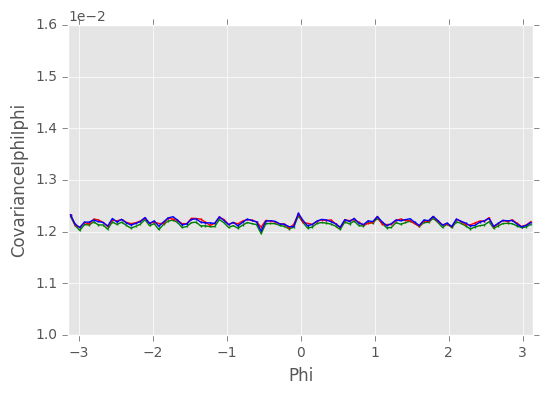

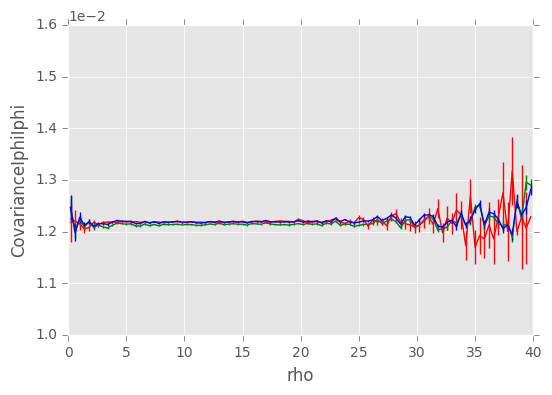

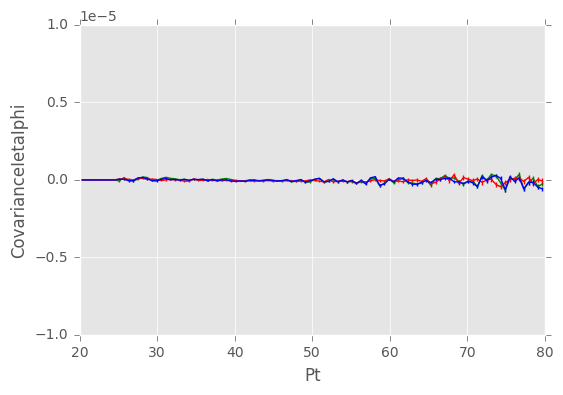

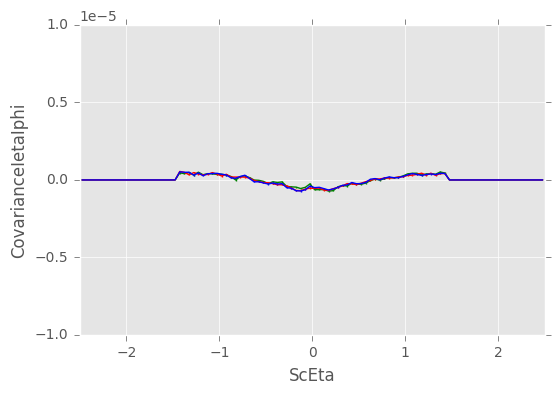

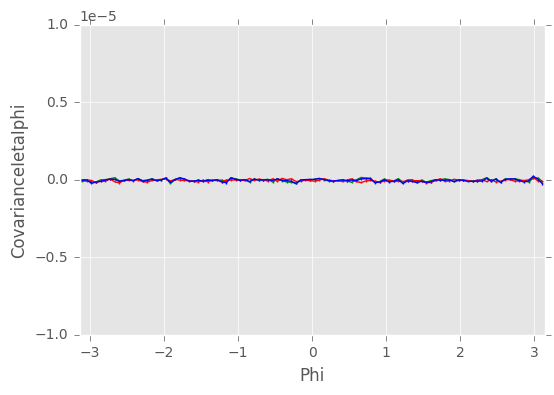

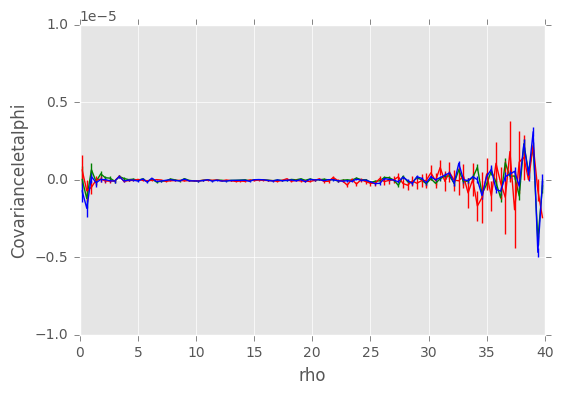

In [20]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section4"
#f = open('Plots/'+section+'.tex', "w")
#f.write('\part{All Periods Profiles '+sec+"}")
#f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 0.9
            ymin,ymax=0.78,0.88
        else: 
            minY, maxY = 0.7, 0.9
            ymin,ymax=0.78,0.88
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.9
            ymin,ymax=0.8,0.88
        else: 
            minY, maxY = 0.75, 0.9
            ymin,ymax=0.8,0.88
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.008, 0.0095
            ymin,ymax=0.0086,0.009
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.01, 0.06
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.02, 0.06
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.011,0.014
        else: 
            minY, maxY = 0.025, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0001, 0.0001
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        #plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


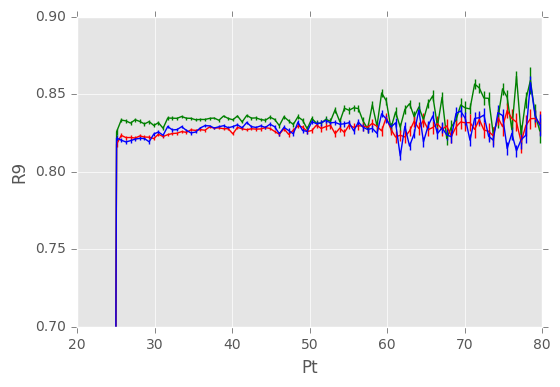

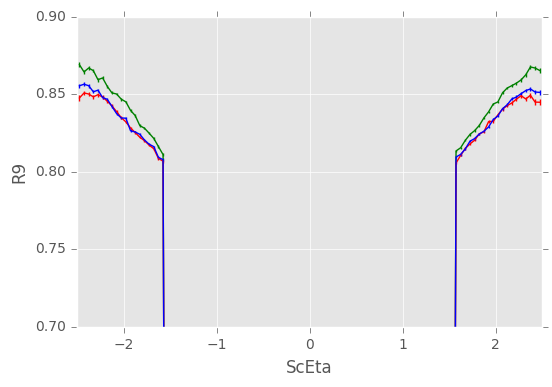

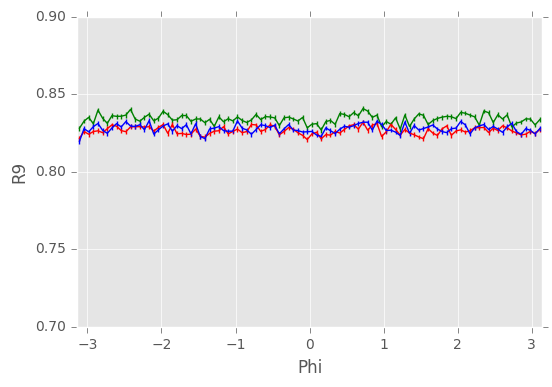

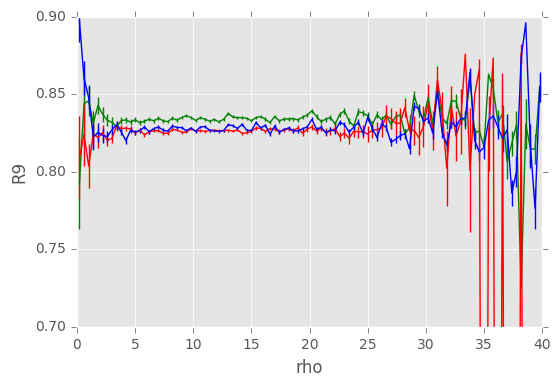

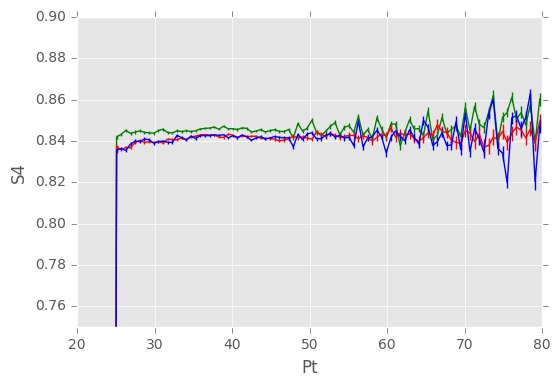

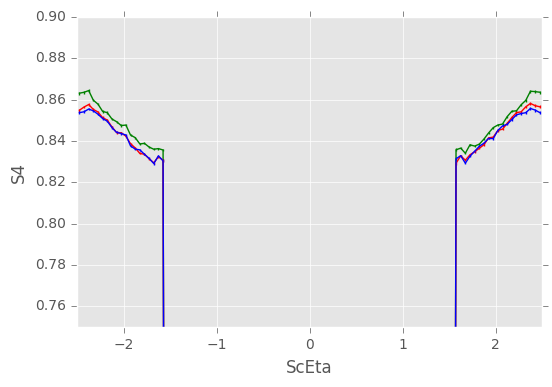

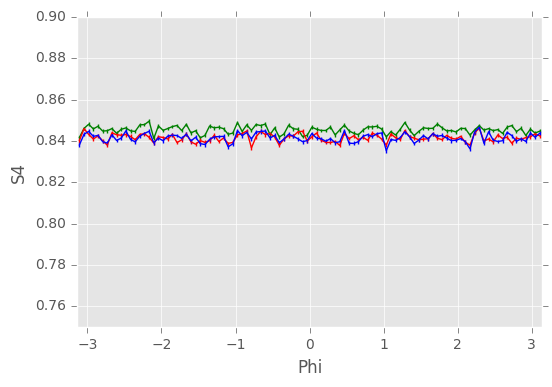

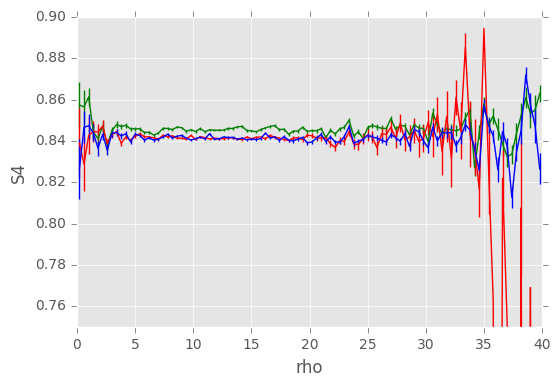

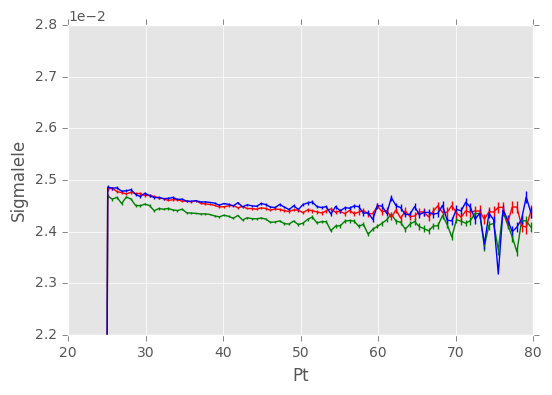

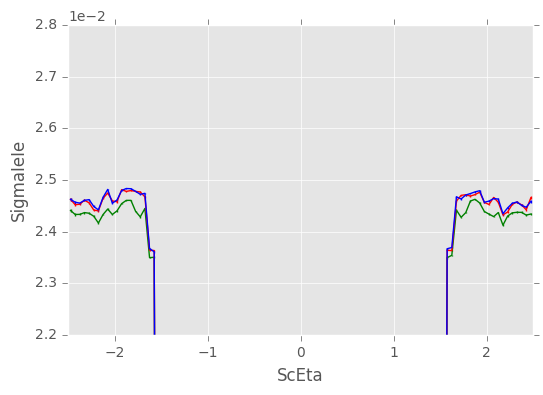

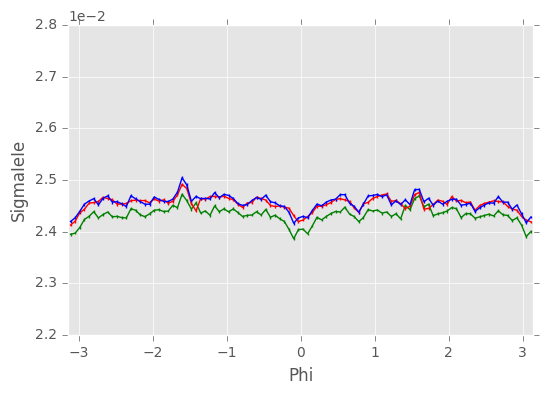

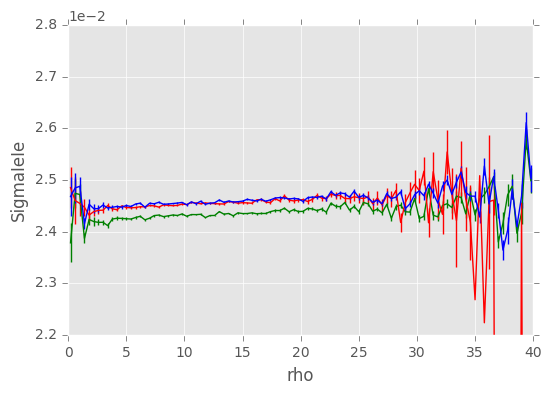

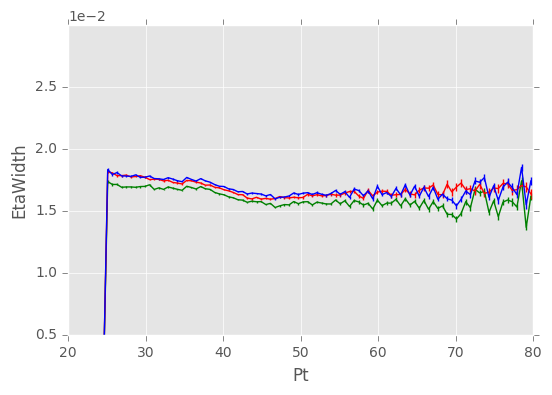

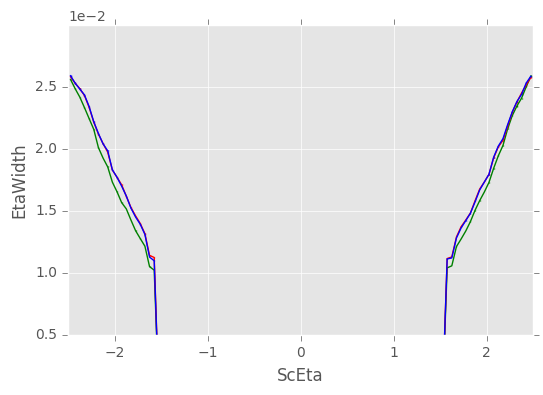

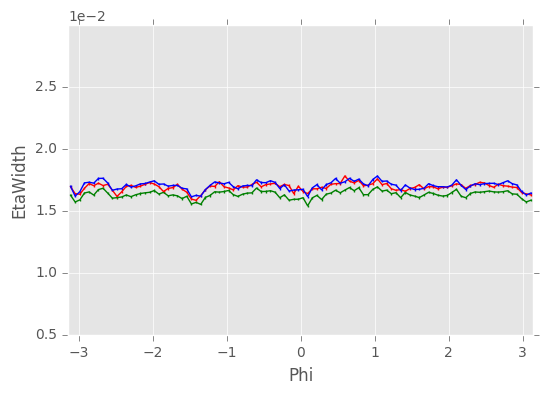

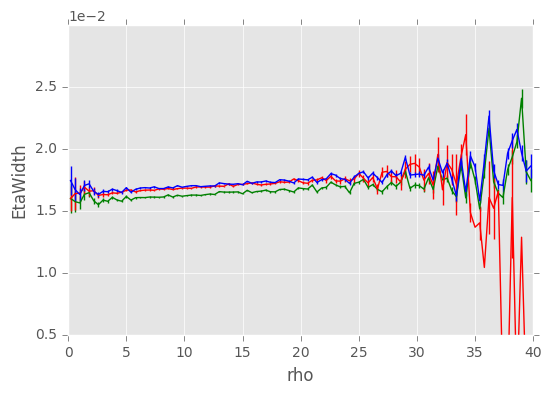

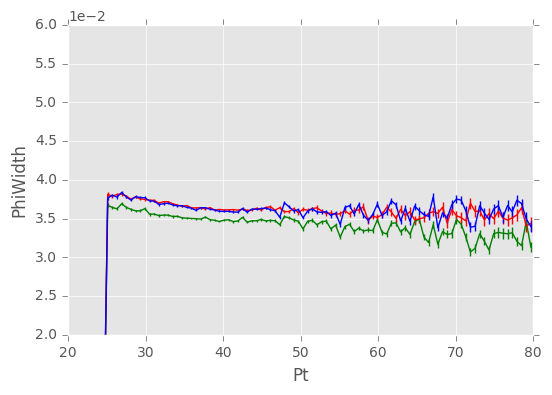

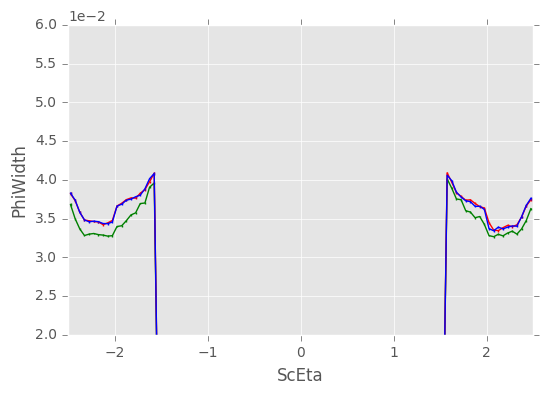

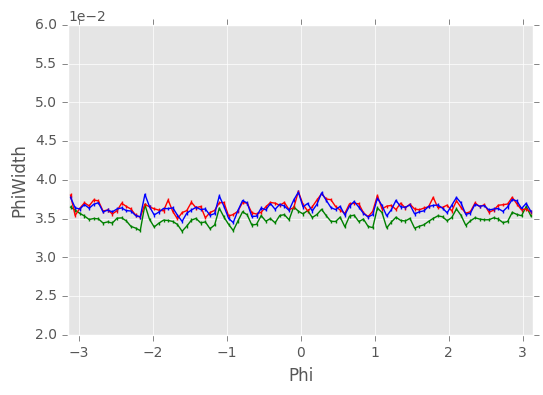

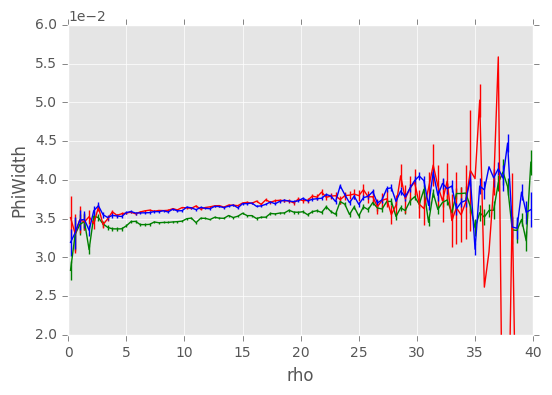

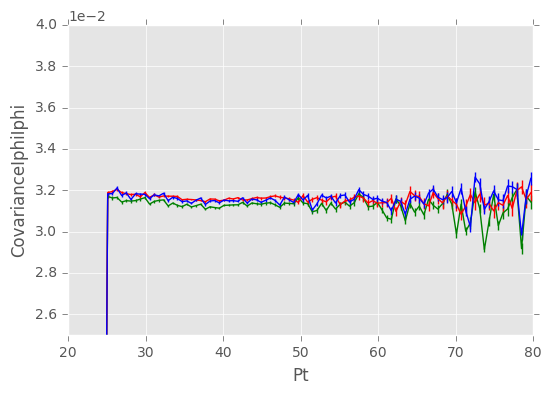

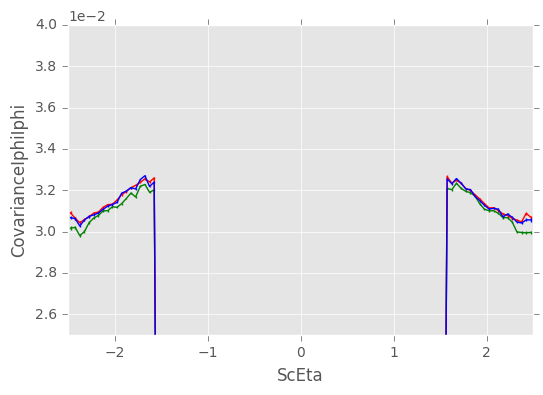

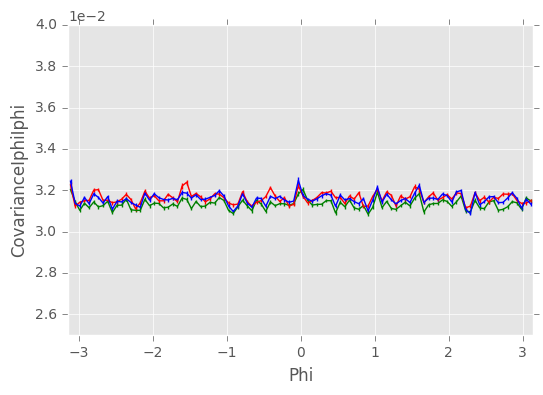

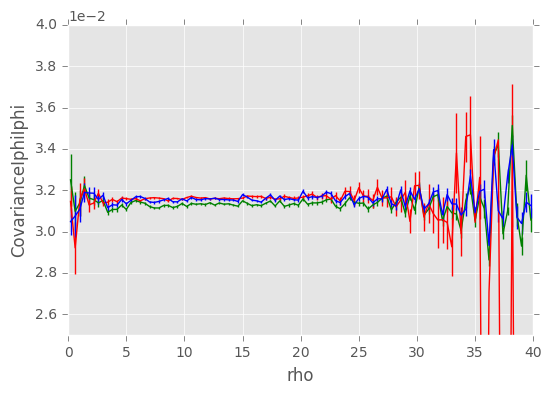

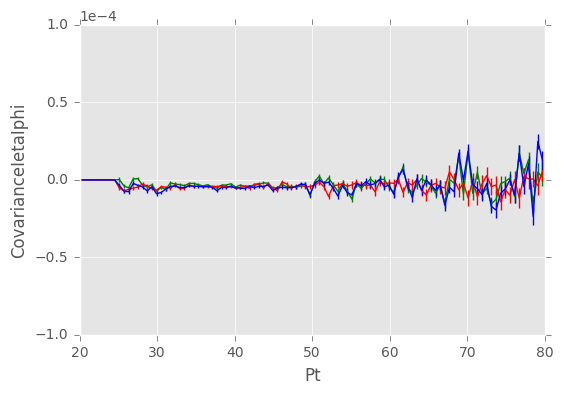

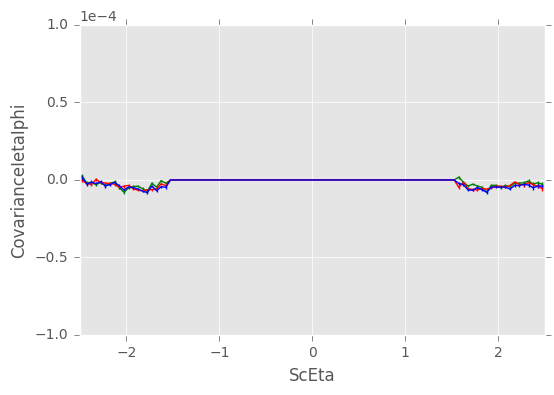

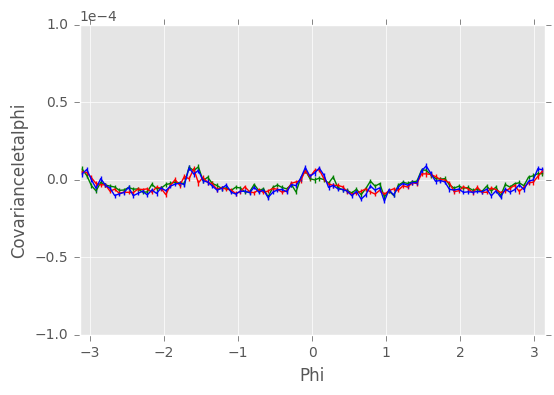

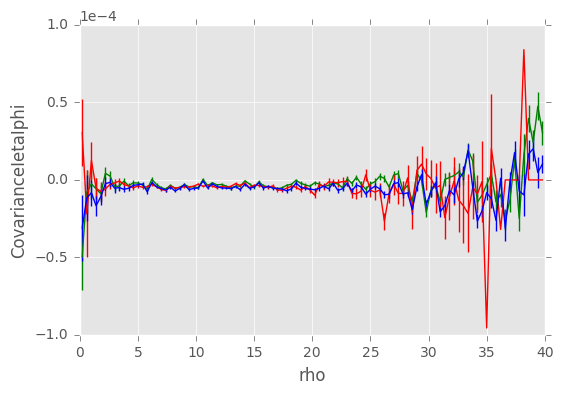

In [21]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section4"
#f = open('Plots/'+section+'.tex', "w")
#f.write('\part{All Periods Profiles '+sec+"}")
#f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 0.9
            ymin,ymax=0.78,0.88
        else: 
            minY, maxY = 0.7, 0.9
            ymin,ymax=0.78,0.88
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.9
            ymin,ymax=0.8,0.88
        else: 
            minY, maxY = 0.75, 0.9
            ymin,ymax=0.8,0.88
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.008, 0.0095
            ymin,ymax=0.0086,0.009
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.01, 0.06
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.02, 0.06
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.011,0.014
        else: 
            minY, maxY = 0.025, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0001, 0.0001
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        #plot.exportToPdf(name,section)